# Holocene Ice Window Increment

In [1]:
import pyleoclim as pyleo
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import ammonyte as amt
import seaborn as sns
import pandas as pd

from pylipd.lipd import LiPD

In [2]:
#We suppress warnings for these notebooks for presentation purposes. Best practice is to not do this though.
import warnings
warnings.filterwarnings('ignore')

In [3]:
color_list = sns.color_palette('colorblind')

In [4]:
lipd_path = './data/8k_ice'

all_files = LiPD()

if __name__=='__main__':
    all_files.load_from_dir(lipd_path)

record_names = all_files.get_all_dataset_names()

Directory ./data/8k_ice does not exist


In [5]:
series_list = []

# We specify the indices of interest in each dataframe by hand here

index_dict = {
    'GRIP.GRIP.1992' : 'd18O',
    'Renland.Johnsen.1992' : 'd18O',
    'EDML.Stenni.2010' : 'bagd18O',
    'EPICADomeC.Stenni.2010' : 'bagd18O',
    'Vostok.Vimeux.2002' : 'temperature',
    'GISP2.Grootes.1997' : 'd18O',
    'NGRIP.NGRIP.2004' : 'd18O',
    'TALDICE.Mezgec.2017' : 'd18O',
}

for record in record_names:
    d = LiPD()
    d.load(f'{lipd_path}/{record}.lpd')
    df = d.get_timeseries_essentials()
    row = df[df['paleoData_variableName']==index_dict[record]][df['time_variableName']=='age']
    lat = row['geo_meanLat'].to_numpy()[0]
    lon = row['geo_meanLon'].to_numpy()[0]
    elevation = row['geo_meanElev'].to_numpy()[0]
    value = row['paleoData_values'].to_numpy()[0]
    value_name = row['paleoData_variableName'].to_numpy()[0]
    value_unit = row['paleoData_units'].to_numpy()[0]
    time = row['time_values'].to_numpy()[0]
    time_unit = row['time_units'].to_numpy()[0]
    time_name = row['time_variableName'].to_numpy()[0]
    label = row['dataSetName'].to_numpy()[0]
    geo_series = pyleo.GeoSeries(time=time,
                                 value=value,
                                 lat=lat,
                                 lon=lon,
                                 elevation=elevation,
                                 time_unit=time_unit,
                                 time_name=time_name,
                                 value_name=value_name,
                                 value_unit=value_unit,
                                 label=label,
                                 archiveType='ice')
    series_list.append(geo_series)

geo_ms = pyleo.MultipleGeoSeries(series_list)

In [6]:
ms_list = []

for series in geo_ms.series_list:
    if series.lat > 0 or series.label == 'EPICADomeC.Stenni.2010':
        series.time_unit = 'Years BP'
        ms_list.append(series)
        

In [7]:
end_time = 10000

ms_ice = pyleo.MultipleSeries([series.slice((0,end_time)) for series in ms_list])
ms_ice.stackplot(colors=color_list[:len(ms_ice.series_list)])

ValueError: attempt to get argmax of an empty sequence

In [61]:
m = 12
w_incre_list = np.arange(2,9,2)
res_dict = {}
lp_dict = {}

for idx,series in enumerate(ms_ice.series_list):
    name = series.label
    print(f'Analyzing {name}')
    for w_incre in tqdm(w_incre_list):
        series_slice = series.slice((0,end_time))
        td = amt.TimeEmbeddedSeries(series=series.slice((0,end_time)),m=m) #Tau is selected via first minimum of mutual info
        eps = td.find_epsilon(eps=1,target_density=.05,tolerance=.01,verbose=False)
        rm = eps['Output']
        lp = rm.laplacian_eigenmaps(w_size=20,w_incre=w_incre)
        
        if name not in res_dict:
            res_dict[name] = []
        if name not in lp_dict:
            lp_dict[name] = []

        lp_dict[name].append(lp)

Analyzing Renland.Johnsen.1992


  0%|          | 0/4 [00:00<?, ?it/s]/Users/alexjames/Documents/GitHub/Ammonyte/ammonyte/core/rqa_res.py:22: UserWarning: auto_time_params is not specified. Currently default behavior sets this to True. In a future release this will be changed to False.
  super().__init__(time,value,time_name,time_unit,value_name,value_unit,label,sort_ts=None)
/Users/alexjames/Documents/GitHub/Ammonyte/ammonyte/core/rqa_res.py:22: UserWarning: No time_name parameter provided. Assuming "Time".
  super().__init__(time,value,time_name,time_unit,value_name,value_unit,label,sort_ts=None)
 25%|██▌       | 1/4 [00:00<00:01,  1.57it/s]/Users/alexjames/Documents/GitHub/Ammonyte/ammonyte/core/rqa_res.py:22: UserWarning: auto_time_params is not specified. Currently default behavior sets this to True. In a future release this will be changed to False.
  super().__init__(time,value,time_name,time_unit,value_name,value_unit,label,sort_ts=None)
/Users/alexjames/Documents/GitHub/Ammonyte/ammonyte/core/rqa_res.py:22: U

Analyzing EPICADomeC.Stenni.2010


  0%|          | 0/4 [00:00<?, ?it/s]/Users/alexjames/Documents/GitHub/Ammonyte/ammonyte/core/rqa_res.py:22: UserWarning: auto_time_params is not specified. Currently default behavior sets this to True. In a future release this will be changed to False.
  super().__init__(time,value,time_name,time_unit,value_name,value_unit,label,sort_ts=None)
/Users/alexjames/Documents/GitHub/Ammonyte/ammonyte/core/rqa_res.py:22: UserWarning: No time_name parameter provided. Assuming "Time".
  super().__init__(time,value,time_name,time_unit,value_name,value_unit,label,sort_ts=None)
 25%|██▌       | 1/4 [00:00<00:01,  1.51it/s]/Users/alexjames/Documents/GitHub/Ammonyte/ammonyte/core/rqa_res.py:22: UserWarning: auto_time_params is not specified. Currently default behavior sets this to True. In a future release this will be changed to False.
  super().__init__(time,value,time_name,time_unit,value_name,value_unit,label,sort_ts=None)
/Users/alexjames/Documents/GitHub/Ammonyte/ammonyte/core/rqa_res.py:22: U

Analyzing GISP2.Grootes.1997


  0%|          | 0/4 [00:00<?, ?it/s]/Users/alexjames/Documents/GitHub/Ammonyte/ammonyte/core/rqa_res.py:22: UserWarning: auto_time_params is not specified. Currently default behavior sets this to True. In a future release this will be changed to False.
  super().__init__(time,value,time_name,time_unit,value_name,value_unit,label,sort_ts=None)
/Users/alexjames/Documents/GitHub/Ammonyte/ammonyte/core/rqa_res.py:22: UserWarning: No time_name parameter provided. Assuming "Time".
  super().__init__(time,value,time_name,time_unit,value_name,value_unit,label,sort_ts=None)
 25%|██▌       | 1/4 [00:01<00:05,  1.76s/it]/Users/alexjames/Documents/GitHub/Ammonyte/ammonyte/core/rqa_res.py:22: UserWarning: auto_time_params is not specified. Currently default behavior sets this to True. In a future release this will be changed to False.
  super().__init__(time,value,time_name,time_unit,value_name,value_unit,label,sort_ts=None)
/Users/alexjames/Documents/GitHub/Ammonyte/ammonyte/core/rqa_res.py:22: U

Analyzing GRIP.GRIP.1992


  0%|          | 0/4 [00:00<?, ?it/s]/Users/alexjames/Documents/GitHub/Ammonyte/ammonyte/core/rqa_res.py:22: UserWarning: auto_time_params is not specified. Currently default behavior sets this to True. In a future release this will be changed to False.
  super().__init__(time,value,time_name,time_unit,value_name,value_unit,label,sort_ts=None)
/Users/alexjames/Documents/GitHub/Ammonyte/ammonyte/core/rqa_res.py:22: UserWarning: No time_name parameter provided. Assuming "Time".
  super().__init__(time,value,time_name,time_unit,value_name,value_unit,label,sort_ts=None)
 25%|██▌       | 1/4 [00:04<00:13,  4.51s/it]/Users/alexjames/Documents/GitHub/Ammonyte/ammonyte/core/rqa_res.py:22: UserWarning: auto_time_params is not specified. Currently default behavior sets this to True. In a future release this will be changed to False.
  super().__init__(time,value,time_name,time_unit,value_name,value_unit,label,sort_ts=None)
/Users/alexjames/Documents/GitHub/Ammonyte/ammonyte/core/rqa_res.py:22: U

Analyzing NGRIP.NGRIP.2004


  0%|          | 0/4 [00:00<?, ?it/s]/Users/alexjames/Documents/GitHub/Ammonyte/ammonyte/core/rqa_res.py:22: UserWarning: auto_time_params is not specified. Currently default behavior sets this to True. In a future release this will be changed to False.
  super().__init__(time,value,time_name,time_unit,value_name,value_unit,label,sort_ts=None)
/Users/alexjames/Documents/GitHub/Ammonyte/ammonyte/core/rqa_res.py:22: UserWarning: No time_name parameter provided. Assuming "Time".
  super().__init__(time,value,time_name,time_unit,value_name,value_unit,label,sort_ts=None)
 25%|██▌       | 1/4 [00:00<00:02,  1.32it/s]/Users/alexjames/Documents/GitHub/Ammonyte/ammonyte/core/rqa_res.py:22: UserWarning: auto_time_params is not specified. Currently default behavior sets this to True. In a future release this will be changed to False.
  super().__init__(time,value,time_name,time_unit,value_name,value_unit,label,sort_ts=None)
/Users/alexjames/Documents/GitHub/Ammonyte/ammonyte/core/rqa_res.py:22: U

4it [00:08,  2.20s/it]


Text(0.5, 0.98, 'Renland.Johnsen.1992')

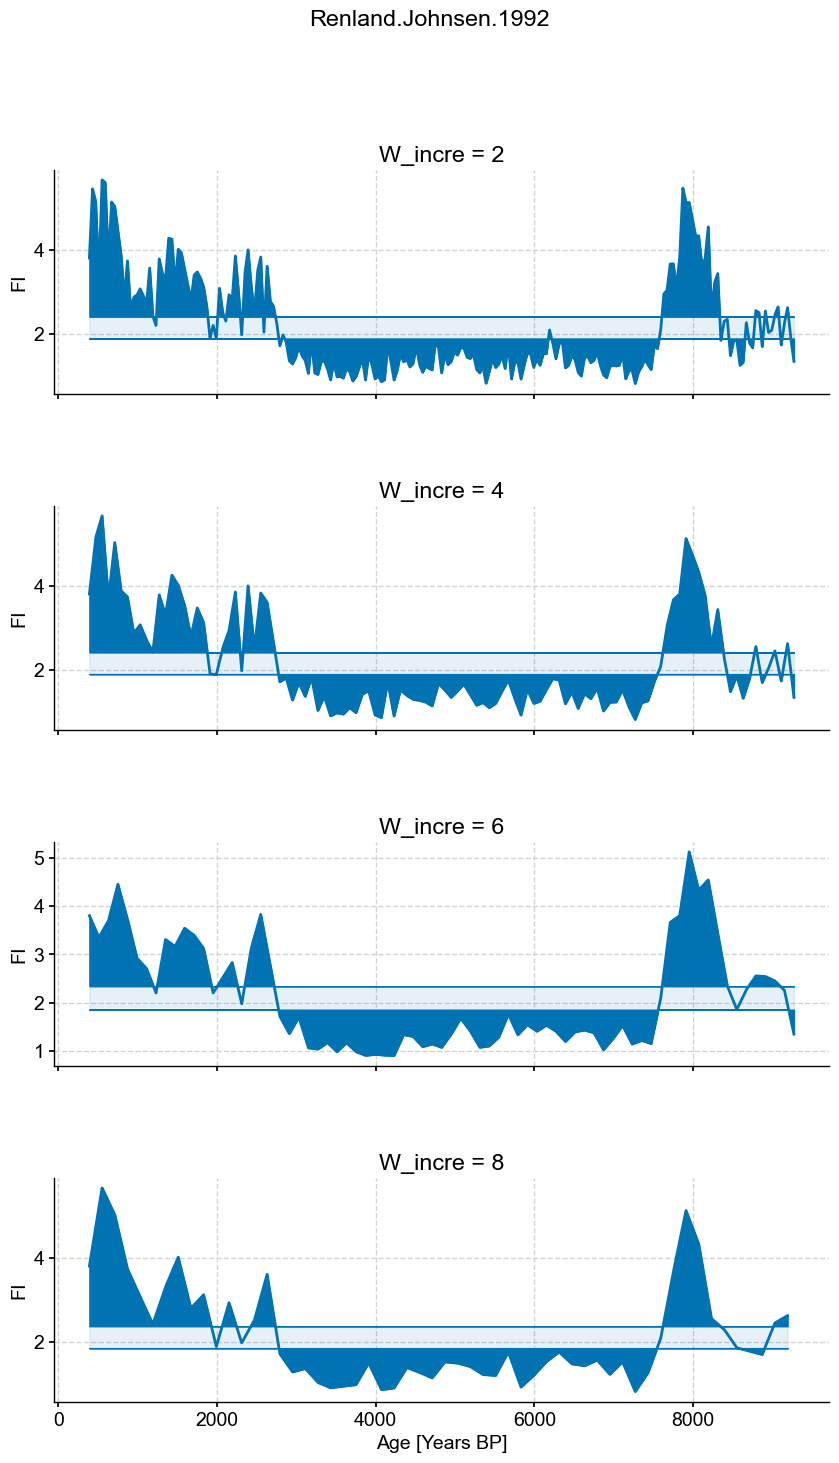

In [62]:
name = ms_list[0].label

fig,ax = plt.subplots(nrows=len(lp_dict[name]),figsize=(10,4*len(w_incre_list)),sharex=True)
fig.subplots_adjust(hspace=.5)
axes = ax.ravel()

for idx,series in tqdm(enumerate(lp_dict[name])):
    series.confidence_fill_plot(ax=axes[idx],title=f'W_incre = {w_incre_list[idx]}')
    axes[idx].set_ylabel('FI')
    if idx < len(axes)-1:
        axes[idx].set_xlabel('')
    axes[idx].get_legend().remove()

fig.suptitle(name)

4it [00:08,  2.16s/it]


Text(0.5, 0.98, 'EPICADomeC.Stenni.2010')

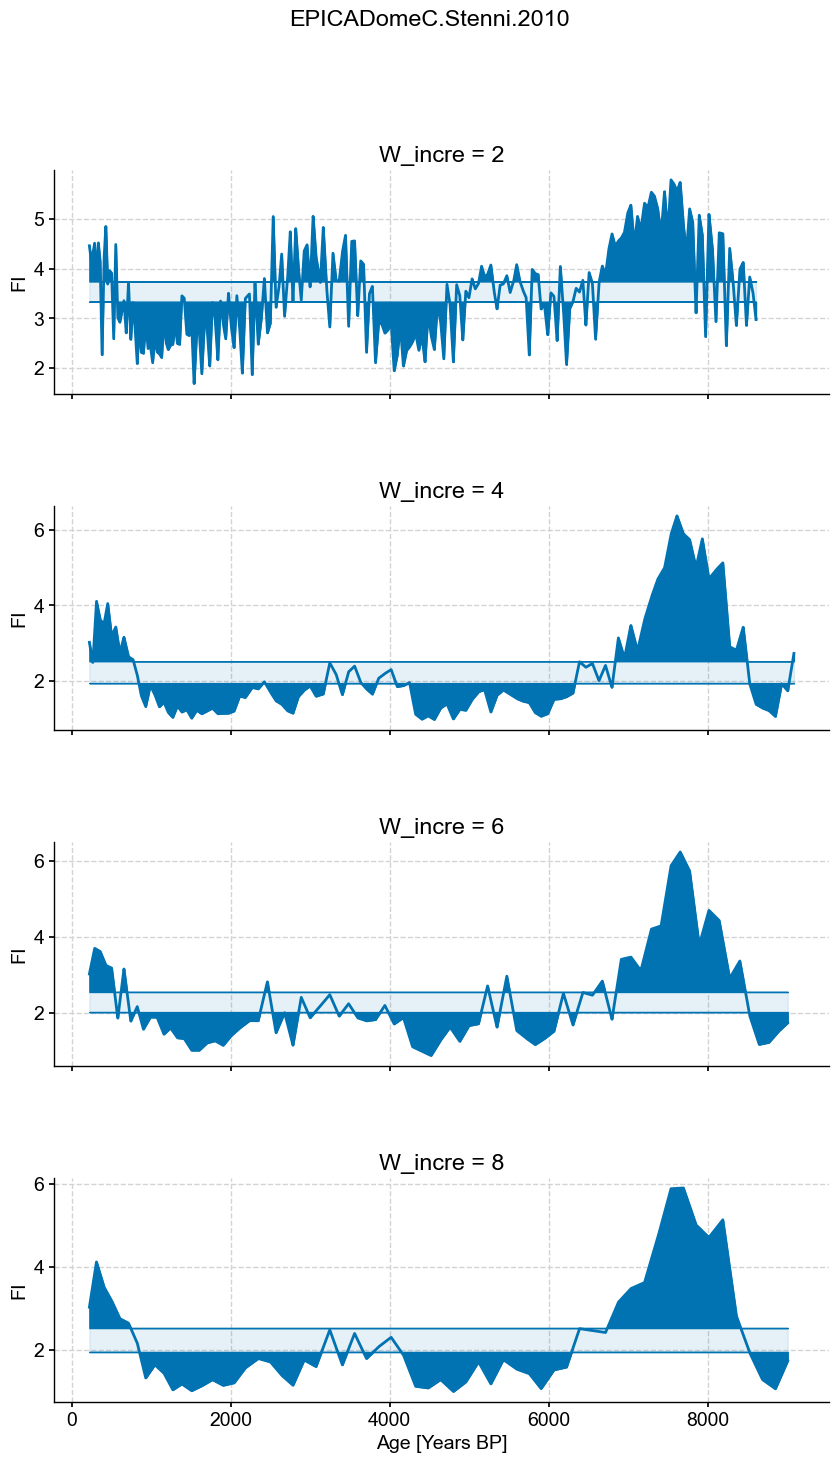

In [63]:
name = ms_list[1].label

fig,ax = plt.subplots(nrows=len(lp_dict[name]),figsize=(10,4*len(w_incre_list)),sharex=True)
fig.subplots_adjust(hspace=.5)
axes = ax.ravel()

for idx,series in tqdm(enumerate(lp_dict[name])):
    series.confidence_fill_plot(ax=axes[idx],title=f'W_incre = {w_incre_list[idx]}')
    axes[idx].set_ylabel('FI')
    if idx < len(axes)-1:
        axes[idx].set_xlabel('')
    axes[idx].get_legend().remove()

fig.suptitle(name)

4it [00:08,  2.24s/it]


Text(0.5, 0.98, 'GISP2.Grootes.1997')

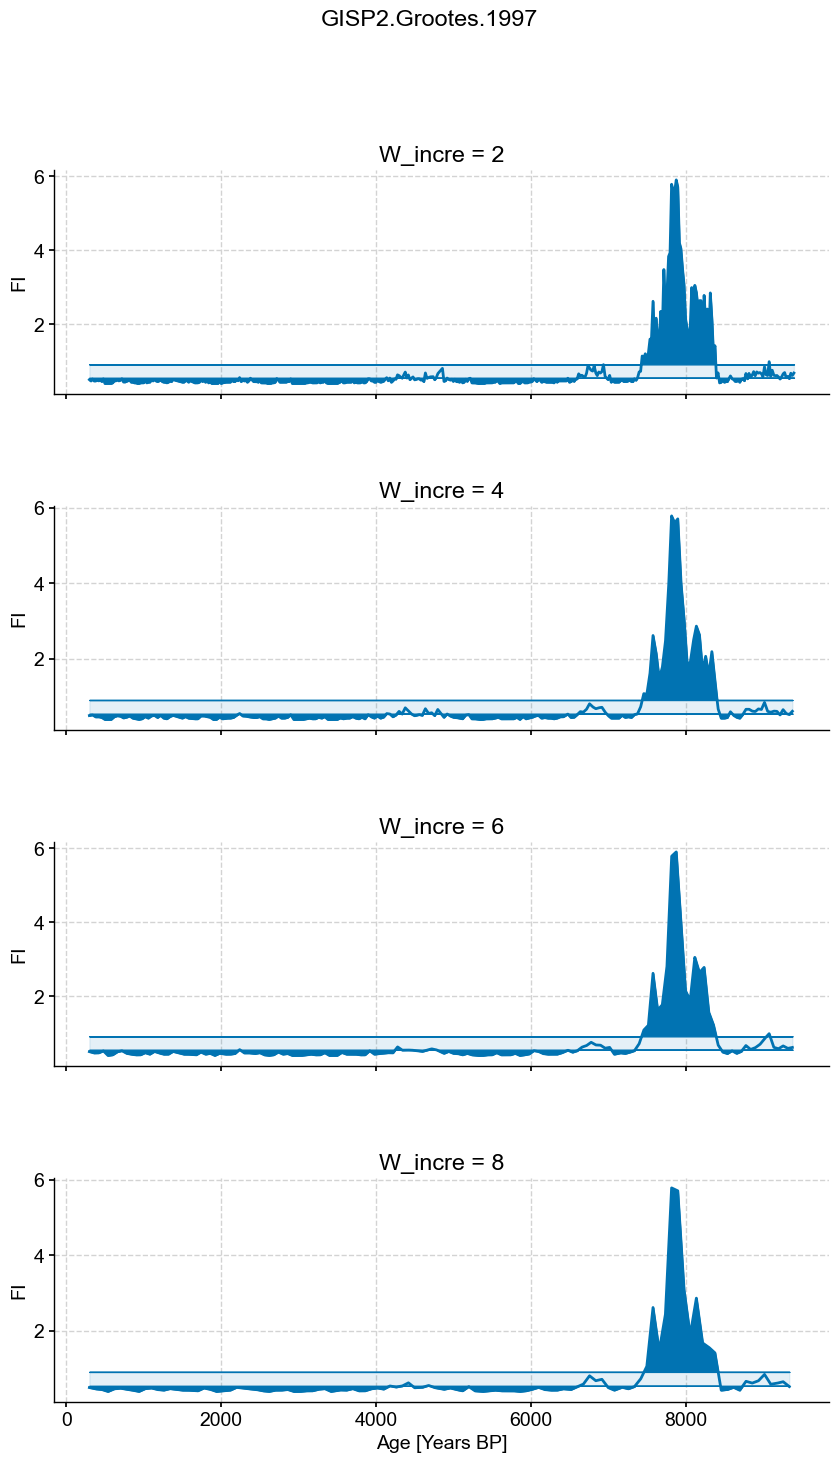

In [64]:
name = ms_list[2].label

fig,ax = plt.subplots(nrows=len(lp_dict[name]),figsize=(10,4*len(w_incre_list)),sharex=True)
fig.subplots_adjust(hspace=.5)
axes = ax.ravel()

for idx,series in tqdm(enumerate(lp_dict[name])):
    series.confidence_fill_plot(ax=axes[idx],title=f'W_incre = {w_incre_list[idx]}')
    axes[idx].set_ylabel('FI')
    if idx < len(axes)-1:
        axes[idx].set_xlabel('')
    axes[idx].get_legend().remove()

fig.suptitle(name)

4it [00:09,  2.45s/it]


Text(0.5, 0.98, 'GRIP.GRIP.1992')

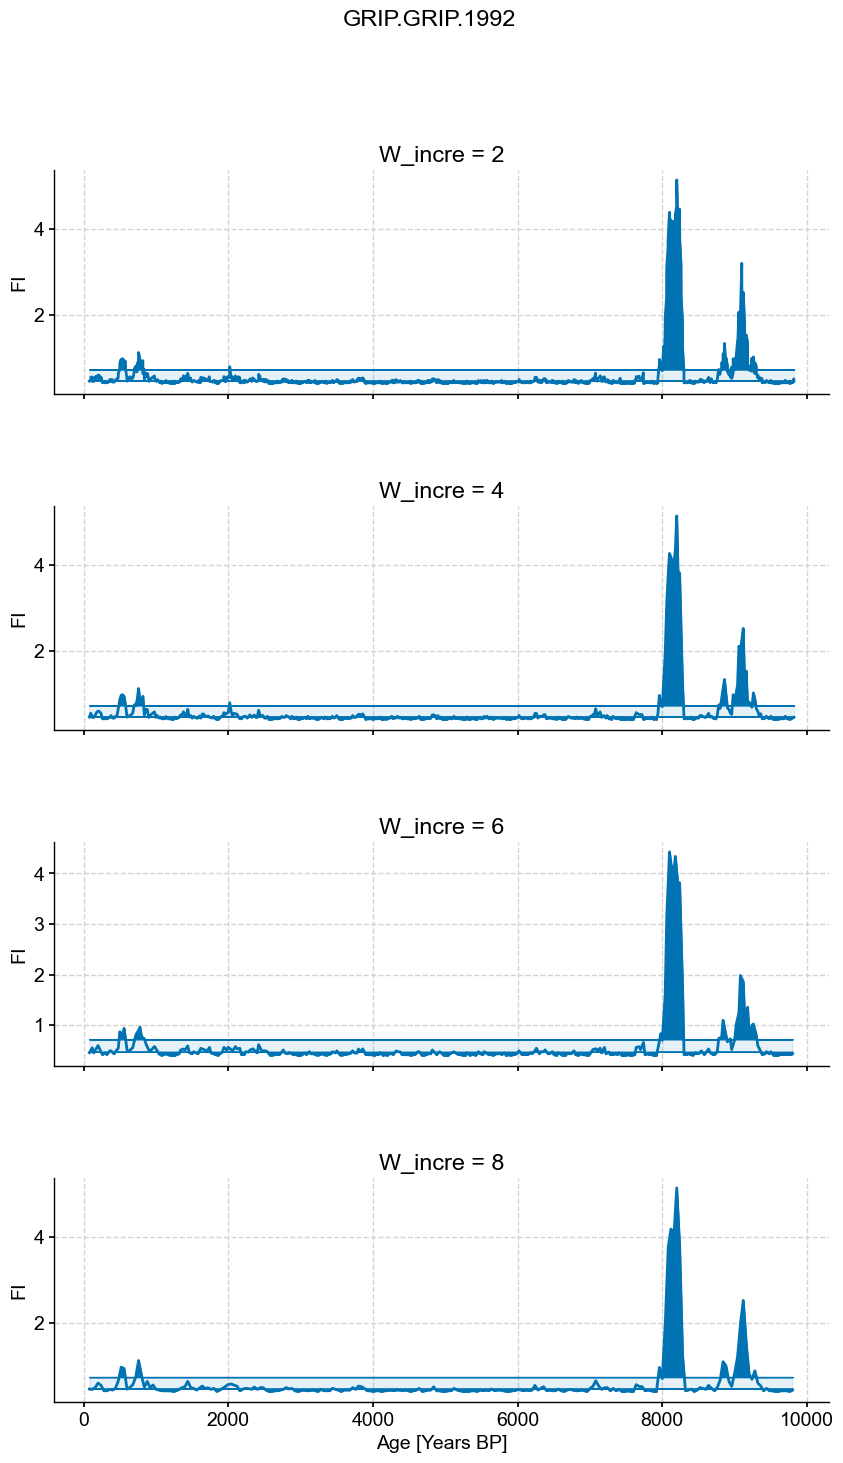

In [65]:
name = ms_list[3].label

fig,ax = plt.subplots(nrows=len(lp_dict[name]),figsize=(10,4*len(w_incre_list)),sharex=True)
fig.subplots_adjust(hspace=.5)
axes = ax.ravel()

for idx,series in tqdm(enumerate(lp_dict[name])):
    series.confidence_fill_plot(ax=axes[idx],title=f'W_incre = {w_incre_list[idx]}')
    axes[idx].set_ylabel('FI')
    if idx < len(axes)-1:
        axes[idx].set_xlabel('')
    axes[idx].get_legend().remove()

fig.suptitle(name)

4it [00:08,  2.15s/it]


Text(0.5, 0.98, 'NGRIP.NGRIP.2004')

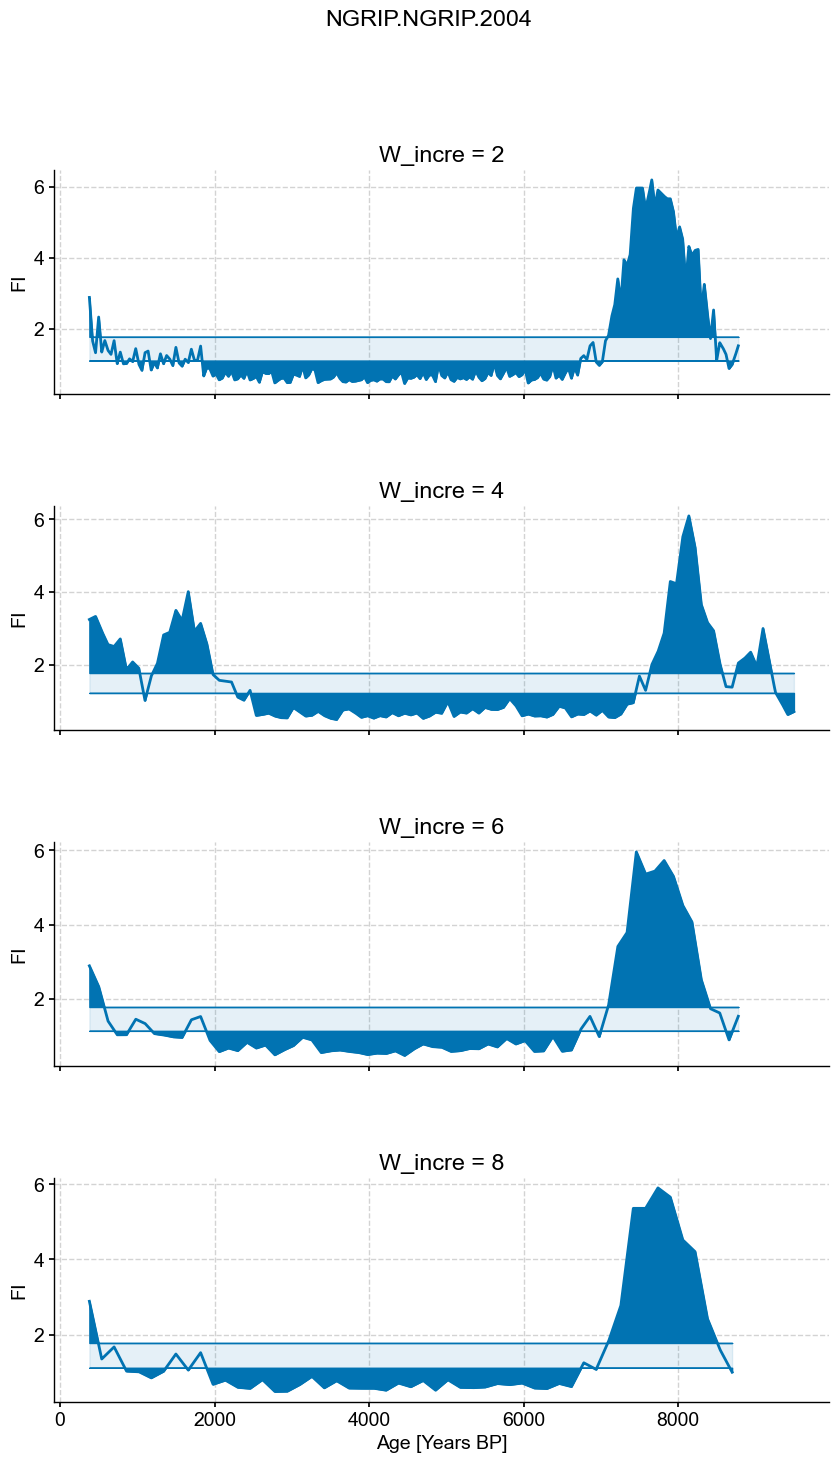

In [66]:
name = ms_list[4].label

fig,ax = plt.subplots(nrows=len(lp_dict[name]),figsize=(10,4*len(w_incre_list)),sharex=True)
fig.subplots_adjust(hspace=.5)
axes = ax.ravel()

for idx,series in tqdm(enumerate(lp_dict[name])):
    series.confidence_fill_plot(ax=axes[idx],title=f'W_incre = {w_incre_list[idx]}')
    axes[idx].set_ylabel('FI')
    if idx < len(axes)-1:
        axes[idx].set_xlabel('')
    axes[idx].get_legend().remove()

fig.suptitle(name)